<a href="https://colab.research.google.com/github/pmendizabal/crash_course_on_analytics_with_python/blob/main/Pandas_3_BI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica de BI, con ventas

In [13]:
import pandas as pd
import os

path = '/content/drive/MyDrive/Colab_Notebooks/Data_Analysis_Pandas'
files = [file for file in os.listdir(path) if not file.endswith('.ipynb')]
files = files[3:]
files

['Sales_September_2019.csv',
 'Sales_August_2019.csv',
 'Sales_January_2019.csv',
 'Sales_March_2019.csv',
 'Sales_June_2019.csv',
 'Sales_July_2019.csv',
 'Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_October_2019.csv',
 'Sales_November_2019.csv',
 'Sales_May_2019.csv']

In [14]:
master_df = pd.DataFrame()

for file in files:
  data = pd.read_csv(path+"/"+file)
  master_df = pd.concat([master_df,data])

master_df.to_csv('complete_data.csv', index = False)

master_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
16630,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101"
16631,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016"
16632,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215"
16633,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101"


###Limpieza de datos



In [15]:
#Buscamos null values 
nan_df = master_df[master_df.isna().any(axis=1)]
display(nan_df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
198,NaN,NaN,NaN,NaN,NaN,NaN
574,NaN,NaN,NaN,NaN,NaN,NaN
776,NaN,NaN,NaN,NaN,NaN,NaN
1383,NaN,NaN,NaN,NaN,NaN,NaN
1436,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
master_df = master_df.dropna(how='all')
nan_df = master_df[master_df.isna().any(axis=1)]
display(nan_df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [18]:
#Nos deshacemos de posibles textos en la fecha de pedido, igual aplica si se quiere
#en otras columnas
master_df = master_df[master_df['Order Date'].str[0:2]!='Or']
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [19]:
#Poner los tipos de datos correctos en las columnas
master_df['Quantity Ordered'] = pd.to_numeric(master_df['Quantity Ordered'])
master_df['Price Each'] = pd.to_numeric(master_df['Price Each'])

In [20]:
#Si asi lo deseamos, creamos una columna de mes
master_df['Month'] = master_df['Order Date'].str[0:2]
master_df['Month'] = master_df['Month'].astype('int32')
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9


In [21]:
#Agregamos una columna para ciudad
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

master_df['City'] = master_df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,Los Angeles (CA)
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,Austin (TX)
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,Los Angeles (CA)
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,Seattle (WA)
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,Atlanta (GA)


###Exploración 

En este apartado se entra de lleno en el análisis, por lo regular, queremos obtener datos según métricas o preguntas básicas sobre la operación donde se desenvuelva el trabajo que tenemos

Pregunta: ¿Cual ha sido el mejor mes en cuestión de ventas? ¿Cuanto se gano en dicho mes?

In [22]:
master_df['Sales'] = master_df['Quantity Ordered']* master_df['Price Each']
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,Los Angeles (CA),15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,Austin (TX),23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,Los Angeles (CA),11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,Seattle (WA),149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,Atlanta (GA),11.95


In [23]:
master_df.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [24]:
master_df.groupby(['Month']).sum().max()

Quantity Ordered    2.811400e+04
Price Each          4.588415e+06
Sales               4.613443e+06
dtype: float64

range(1, 13)


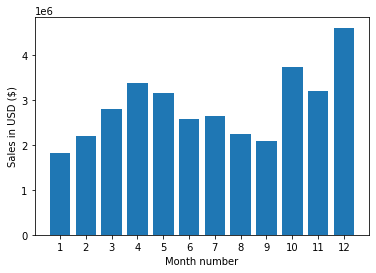

In [26]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,master_df.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

Pregunta: ¿En que ciudad se vendió más?



In [27]:
master_df.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


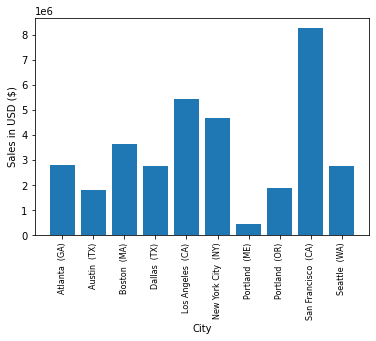

In [29]:
import matplotlib.pyplot as plt

keys = [city for city, df in master_df.groupby(['City'])]

plt.bar(keys,master_df.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

Pregunta: ¿A qué hora debemos mostrar anuncios para maximizar la probabilidad de que el cliente compre un producto?

In [30]:
#Dividimos el timestamp
master_df['Hour'] = pd.to_datetime(master_df['Order Date']).dt.hour
master_df['Minute'] = pd.to_datetime(master_df['Order Date']).dt.minute
master_df['Count'] = 1
master_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,Los Angeles (CA),15.36,14,44,1
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,Austin (TX),23.90,10,19,1
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,Los Angeles (CA),11.95,17,48,1
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,Seattle (WA),149.99,7,52,1
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,Atlanta (GA),11.95,19,3,1


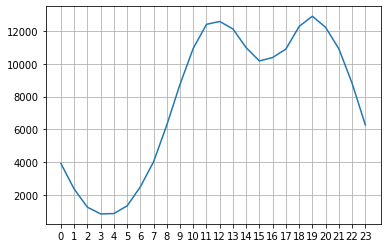

In [31]:
keys = [pair for pair, df in master_df.groupby(['Hour'])]

plt.plot(keys, master_df.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

Pregunta: ¿Que productos se venden mas juntos?

In [34]:
#Primero construimos un df que agrupe los bienes que se vendieron en una misma transacción
df = master_df[master_df['Order ID'].duplicated(keep=False)]
#Creamos una nueva columna que agrupe el nombre de los productos
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
#Dado eso, borramos los duplicados ya que la informacion ya la tenemos en la columna Grouped
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Grouped
20,248171,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,"iPhone,Lightning Charging Cable"
70,248219,"Bose SoundSport Headphones,Google Phone"
117,248265,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,"Google Phone,Bose SoundSport Headphones"
...,...,...
16484,209778,"iPhone,Apple Airpods Headphones"
16492,209785,"Flatscreen TV,AA Batteries (4-pack)"
16502,209794,"USB-C Charging Cable,Wired Headphones"
16520,209810,"AA Batteries (4-pack),USB-C Charging Cable"


In [35]:
from itertools import combinations
from collections import Counter

count = Counter()
#Hacemos un loop para el conteo y lo almacenamos en un objeto
for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
#Obtenemos el top ten
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Pregunta: ¿Qué producto se vendió más? ¿Por qué crees que se vendió más?

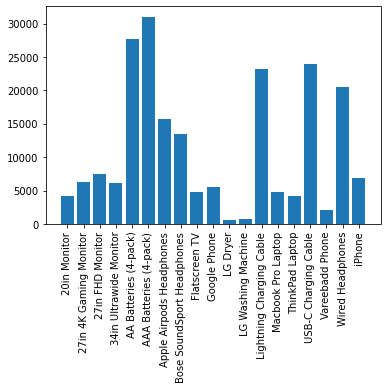

In [44]:
product_group = master_df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

#Obtenemos las keys mediante una iteracion key,value
keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

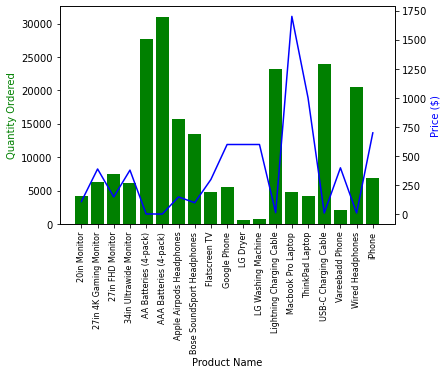

In [45]:
#Veamos los precios, agrupamos y sacamos promedio de precios unitarios
prices = master_df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()